In [1]:
import sys, os

In [2]:
import numpy as np
import exozippy
from exozippy.exozippy_rv import exozippy_rv


### RV fucntion Test

In [3]:


tp = 2450000.0
period = 10.123456
bjd = np.linspace(tp,tp+period,10)
gamma = 20.0
K = 5.0

result = exozippy_rv(bjd, tp, period, gamma, K)
expected_result = np.array([20.0000000000,16.7860619518,15.0759612351,15.6698729813,18.2898992834,21.7101007163,24.3301270186,24.9240387650,23.2139380484,20.0000000004])

abs_diff = np.abs(result - expected_result)
if np.all(abs_diff < 1e-6):
    print("RV function Test passed")

RV function Test passed


### Transit function Test

IDL code for generating LC
```IDL
;; print_transit.rpo
time = FINDGEN(50) * (0.05 - (-0.05)) / (50 - 1) + (-0.05)    
inc = 1.5707963267948966                                        
ar = 15
tp =0
period = 3
e = 0 
omega = 1.5707963267948966 
p = 0.1
u1 = 0.3
u2 = 0.2
f0 = 1
lc = EXOFAST_TRAN(time, inc, ar, tp, period, e,omega, p, u1, u2, f0)
print,lc
exit
```

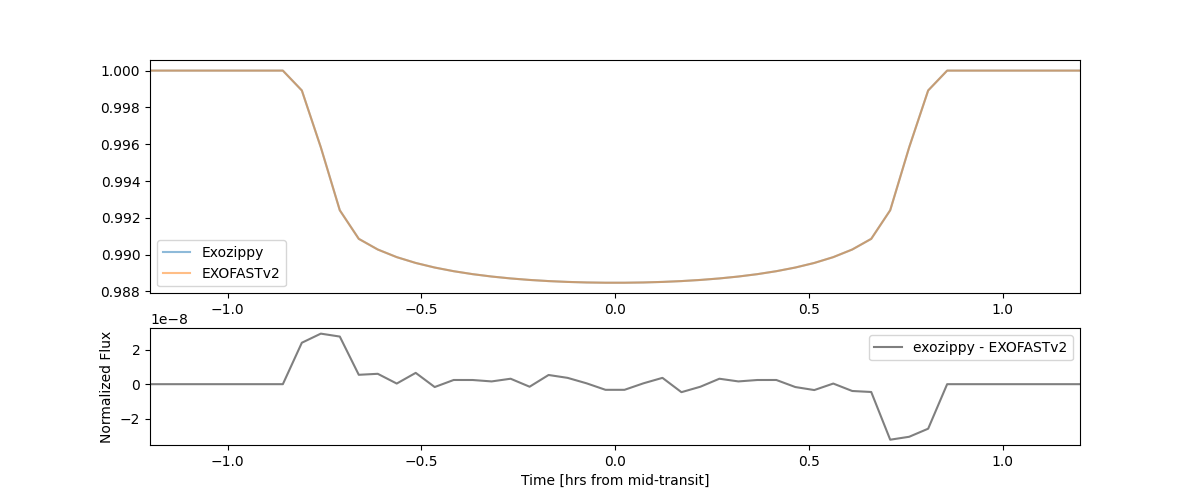

In [4]:
### EXOFASTv2 transit
exofastv2_transit = np.array([1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,\
                                 1.0000000,0.99892081,0.99583177,0.99241022,0.99085690,0.99027731,0.98986287,\
                                 0.98954655,0.98929758,0.98909840,0.98893790,0.98880854,0.98870500,0.98862345,\
                                 0.98856108,0.98851590,0.98848651,0.98847203,0.98847203,0.98848651,0.98851590,\
                                 0.98856109,0.98862345,0.98870500,0.98880854,0.98893790,0.98909840,0.98929758,\
                                 0.98954656,0.98986287,0.99027732,0.99085691,0.99241028,0.99583183,0.99892086,\
                                 1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000])

import numpy as np
import matplotlib.pyplot as plt
from exozippy.exozippy_tran import exozippy_tran  # adjust import path accordingly
%matplotlib widget
def test_exozippy_tran_sample():
    # Time array (days) centered on mid-transit
    time = np.linspace(-0.05, 0.05, 50)  # some arbitrary BJD

    # Planet & star system parameters
    inc = np.radians(90.0)        # nearly edge-on
    ar = 15.0                     # a/R*
    tp = 0         # time of periastron
    period = 3.0                  # days
    e = 0.0                       # circular orbit
    omega = np.radians(90.0)                   # periastron argument
    p = 0.1                       # Rp/R*
    u1 = 0.3                      # LD coefficients
    u2 = 0.2
    f0 = 1.0                      # baseline flux

    # Call model
    model_flux = exozippy_tran(
        time, inc, ar, tp, period, e, omega, p, u1, u2, f0
    )

    # Check output shape
    assert model_flux.shape == time.shape, "Model output shape mismatch"

    # # Check that there is some dimming (i.e., transit exists)
    assert np.min(model_flux) < f0 - 1e-4, "No transit dip found in flux"

    import matplotlib.gridspec as gridspec
    plt.figure(figsize=(12, 5))
    nrow = 2
    ncol = 1
    gs = gridspec.GridSpec(nrow, ncol, width_ratios=None, height_ratios=(2,1))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None)
    ax = plt.subplot(gs[0])
    min_x = np.min(time*24)
    max_x = np.max(time*24)
    ax.set_xlim(min_x, max_x)
    ax.plot(time*24, model_flux, label="Exozippy", alpha=0.5)
    ax.plot(
        time*24, exofastv2_transit, label="EXOFASTv2", alpha=0.5
    )
    
    ax.legend()
    
    ax = plt.subplot(gs[1], sharex=ax)
    diff = model_flux - exofastv2_transit
    plt.plot(time*24, diff, label="exozippy - EXOFASTv2", alpha=0.5, color='k')
    plt.xlabel("Time [hrs from mid-transit]")
    plt.ylabel("Normalized Flux")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    test_exozippy_tran_sample()

In [5]:
time = np.linspace(-0.05, 0.05, 50)  # some arbitrary BJD

# Planet & star system parameters
inc = np.radians(90.0)        # nearly edge-on
ar = 15.0                     # a/R*
tp = 0         # time of periastron
period = 3.0                  # days
e = 0.0                       # circular orbit
omega = np.radians(90.0)                   # periastron argument
p = 0.1                       # Rp/R*
u1 = 0.3                      # LD coefficients
u2 = 0.2
f0 = 1.0                      # baseline flux
model_flux = exozippy_tran(
    time, inc, ar, tp, period, e, omega, p, u1, u2, f0
)

In [ ]:
# def test_exozippy_tran_repeated(n=10):
#     for _ in range(n):
#         exozippy_tran(time, inc, ar, tp, period, e, omega, p, u1, u2, f0)

# %prun -l 20 -s tottime test_exozippy_tran_repeated(5000)


         1070004 function calls in 0.814 seconds

   Ordered by: internal time
   List reduced from 47 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     5000    0.304    0.000    0.577    0.000 utils.py:930(exozippy_occultquad_cel)
     5000    0.132    0.000    0.177    0.000 utils.py:516(exozippy_getb2)
     5000    0.086    0.000    0.093    0.000 utils.py:879(sqarea_triangle)
    10000    0.066    0.000    0.069    0.000 utils.py:707(cel_bulirsch_vec)
     5000    0.038    0.000    0.810    0.000 exozippy_tran.py:52(exozippy_tran)
    20000    0.030    0.000    0.049    0.000 function_base.py:5173(delete)
    25000    0.017    0.000    0.022    0.000 numeric.py:67(zeros_like)
    25000    0.015    0.000    0.020    0.000 numeric.py:136(ones)
    35000    0.014    0.000    0.024    0.000 shape_base.py:23(atleast_1d)
    20000    0.014    0.000    0.015    0.000 numeric.py:203(ones_like)
    95000    0.011    0.000    0.011   

In [ ]:
# %%timeit
# model_flux = exozippy_tran(
#     time, inc, ar, tp, period, e, omega, p, u1, u2, f0
# )

127 μs ± 1.34 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
import batman

In [ ]:
# %%timeit
# # import batman
# params = batman.TransitParams()
# params.t0 = 0.                       #time of inferior conjunction
# params.per = 1.                      #orbital period
# params.rp = 0.1                      #planet radius (in units of stellar radii)
# params.a = 15.                       #semi-major axis (in units of stellar radii)
# params.inc = 87.                     #orbital inclination (in degrees)
# params.ecc = 0.                      #eccentricity
# params.w = 90.                       #longitude of periastron (in degrees)
# params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
# params.limb_dark = "quadratic"       #limb darkening model
# t = np.linspace(-0.05, 0.05, 50)
# m = batman.TransitModel(params, t)    #initializes model
# flux = m.light_curve(params)    

7 μs ± 251 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [10]:

from exozippy.utils import *
# np.round(exozippy_getb2(0, 1.5,5,0,3),15)
from scipy.io import readsav

In [11]:
np.float64(exozippy_keplereq(np.atleast_1d(0.1), np.atleast_1d(0.2)))

/var/folders/7m/0jn2hzh91_z_7m1539kskzx00000gn/T/ipykernel_5309/2621554899.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  np.float64(exozippy_keplereq(np.atleast_1d(0.1), np.atleast_1d(0.2)))


0.12491884154998828

In [12]:
from scipy.io import readsav
import glob
# data['bcarray'][0]
# /Users/wangxianyu/Program/Github/EXOZIPPy/data/exofastv2/examples/hat3/n20070428.Sloani.KepCam.dat
# files = glob.glob('./data/exofastv2/examples/hat3/*.dat')
tran_files = glob.glob('../data/exofastv2/examples/hat3/*.dat')

from exozippy.readtran import readtran
for file in tran_files:
    transit = readtran(file)
rv_files = glob.glob('../data/exofastv2/examples/hat3/*.rv')
from exozippy.readrv import readrv
for file in rv_files:
    rv = readrv(file)

uniform: 0.0 < f0_0 < 2.0 (initval=1.0, mu=None, sigma=None)
uniform: -9e+16 < jittervar_0 < 9e+16 (initval=0.0, mu=None, sigma=None)
uniform: 0.0 < u1_0 < 2.0 (initval=0.2, mu=None, sigma=None)
uniform: -1.0 < u2_0 < 1.0 (initval=0.2, mu=None, sigma=None)


In [13]:
from exozippy.utils import get_av_prior
from exozippy.sed.mkticsed import mkticsed
# get_av_prior(object_name='HAT-P-3')
# mkticsed(ticid=307210830)

In [14]:
import re
import json

def parse_param_file(filepath):
    text = open(filepath, 'r').read()
    params = {}
    lines = text.strip().split("\n")
    
    for line in lines:
        line = line.strip()
        if not line or line.startswith("#"):
            continue  # skip comments and blank lines

        parts = re.split(r'\s+', line.split("#")[0].strip())
        label = parts[0]
        values = list(map(float, parts[1:]))

        # Assign values based on number of columns
        mu = values[0] if len(values) > 0 else None
        sigma = values[1] if len(values) > 1 else None
        lower = values[2] if len(values) > 2 else None
        upper = values[3] if len(values) > 3 else None
        initval = values[4] if len(values) > 4 else None

        params[label] = {
            "mu": mu,
            "sigma": sigma,
            "lower": lower,
            "upper": upper,
            "initval": initval
        }

    return params



parsed = parse_param_file('/Users/wangxianyu/Program/Github/EXOZIPPy/data/exofastv2/examples/hat3/HAT-3.priors')
print(json.dumps(parsed, indent=2))
# save to json file
with open('/Users/wangxianyu/Program/Github/EXOZIPPy/data/exofastv2/examples/hat3.json', 'w') as json_file:
    json.dump(parsed, json_file, indent=2)


{
  "mstar": {
    "mu": 0.89,
    "sigma": null,
    "lower": null,
    "upper": null,
    "initval": null
  },
  "rstar": {
    "mu": 0.82,
    "sigma": null,
    "lower": null,
    "upper": null,
    "initval": null
  },
  "teff": {
    "mu": 5224.0,
    "sigma": null,
    "lower": null,
    "upper": null,
    "initval": null
  },
  "feh": {
    "mu": 0.41,
    "sigma": 0.08,
    "lower": null,
    "upper": null,
    "initval": null
  },
  "av": {
    "mu": 0.0,
    "sigma": -1.0,
    "lower": 0.0,
    "upper": 0.07409,
    "initval": null
  },
  "parallax": {
    "mu": 7.4331,
    "sigma": 0.03524,
    "lower": null,
    "upper": null,
    "initval": null
  },
  "period_0": {
    "mu": 2.899703,
    "sigma": 5.4e-05,
    "lower": null,
    "upper": null,
    "initval": null
  },
  "tc": {
    "mu": 2454218.76016,
    "sigma": null,
    "lower": null,
    "upper": null,
    "initval": null
  }
}


In [15]:
from exozippy import exozippy

ss = exozippy.exozippy(parfile="/Users/wangxianyu/Program/Github/EXOZIPPy/data/exofastv2/examples/hat3.json",tranpath="/Users/wangxianyu/Program/Github/EXOZIPPy/data/exofastv2/examples/*.dat")



uniform: rstar_0 = 0.82 (lower=n/a, upper=n/a, initval=None)
uniform: mstar_0 = 0.89 (lower=n/a, upper=n/a, initval=None)
uniform: teff_0 = 5224.0 (lower=n/a, upper=n/a, initval=None)
bounded normal: -5.0 < feh_0 = 0.41 +/- 0.08 < 5.0 (initval=None)
deterministic: lstar_0 (mu=None, lower=None, upper=None, initval=None,sigma=None)
deterministic: rhostar_0 (mu=None, lower=None, upper=None, initval=None,sigma=None)
deterministic: logg_0 (mu=None, lower=None, upper=None, initval=None,sigma=None)
uniform: 1e-09 < logp_0 < 13.7 (initval=1.0, mu=None, sigma=None)
uniform: 1e-09 < rp_0 < 20000.0 (initval=1.0, mu=None, sigma=None)
uniform: tc_0 = 2454218.76016 (lower=n/a, upper=n/a, initval=None)
uniform: -1000000000.0 < mp_0 < 1000000000.0 (initval=1.0, mu=None, sigma=None)
deterministic: period_0 (mu=2.899703, lower=None, upper=None, initval=None,sigma=5.4e-05)
deterministic: p_0 (mu=None, lower=None, upper=None, initval=None,sigma=None)
deterministic: arsun_0 (mu=None, lower=None, upper=None

In [16]:
print(ss['star'][0]['radius'].value)

0.82


In [17]:
# from exozippy.sed import read_sed_file
from exozippy.sed.utils import read_sed_file

sed_data = read_sed_file('/Users/wangxianyu/Program/Github/EXOZIPPy/data/exofastv2/examples/hat3/HAT-3.sed',1)

sedbands = sed_data['sedbands']
mags = sed_data['mag']
errs = sed_data['errmag']
blend = sed_data['blend']
print(sedbands,mags,errs,blend)

['Gaia' 'GaiaBP' 'GaiaRP' 'J2M' 'H2M' 'K2M' 'WISE1' 'WISE2' 'WISE3'] [11.2795 11.7686 10.6721  9.936   9.542   9.448   9.377   9.451   9.389 ] [0.02  0.02  0.02  0.022 0.028 0.025 0.03  0.03  0.035] [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [18]:
from exozippy.sed.utils import read_sed_file
from exozippy.sed.utils import mistmultised    
import numpy as np
import pathlib
# def mistmultised(teff, logg, feh, av, distance, lstar, errscale, sedfile,
#                  redo=False, psname=None, debug=False, atmospheres=None,
#                  wavelength=None, logname=None, range=None, blend0=None):

mistmultised(teff=np.atleast_1d(5777), logg=np.atleast_1d(4.44), feh=np.atleast_1d(0.0),
            av=np.atleast_1d(0.0), distance=np.atleast_1d(10.0), lstar=np.atleast_1d(1.0),
            errscale=np.atleast_1d(1.0),
            sedfile='/Users/wangxianyu/Program/Github/EXOZIPPy/data/exofastv2/examples/hat3/HAT-3.sed',
            redo=False, psname=None, debug=False, atmospheres=None,
            wavelength=None, logname=None, xyrange=None, blend0=None)

# mistmultised(teff=5777, logg=4.44, feh=0.0, av=0.0, distance=10.0, lstar=1.0,
#             errscale=1.0, sedfile='/Users/wangxianyu/Program/Github/EXOZIPPy/data/exofastv2/examples/hat3/HAT-3.sed',
#             redo=False, psname=None, debug=False, atmospheres=None,
#             wavelength=None, logname=None, range=None, blend0=None)

# sedchi2, blendmag, modelflux, magresiduals

NameError: name '_ninterpolate' is not defined

In [ ]:
for i in range(1):
    print(i)

0


In [ ]:
# # import exozippy; print(exozippy.MODULE_PATH)
# import numpy as np
# path = '/Users/wangxianyu/Program/Github/EXOZIPPy/exozippy/sed/mist/filternames2.txt'

# data = np.loadtxt(path, dtype=str, unpack=True)
# data.shape
from scipy.io import readsav
path = '/Users/wangxianyu/Program/Github/EXOZIPPy/exozippy/sed/filtercurves/GAIA_GAIA2r.G.idl'

filter = readsav(path, python_dict=True)['filter']
filter['transmission']

array([array([0., 0., 0., ..., 0., 0., 0.], dtype='>f8')], dtype=object)

In [ ]:
# def filepath(filename, root_dir, subdir):
#     return os.path.join(root_dir, *subdir, filename)
# mistgridfile = filepath('mist.sed.grid.idl', exozippy.MODULE_PATH, ['EXOZIPPy','exozippy','sed', 'mist'])
# grid = readsav(mistgridfile, python_dict=True)
# grid